In [1]:
import pandas as pd

In [2]:
# importando a base de dados

In [3]:
uri ='https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

resultados_exames = pd.read_csv(uri)
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
# como identificar NaN em um dataset? só usar o comando isnull()+sum()
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [5]:
# separando os dados em treino/teste xy  ///// Setando a SEED

In [6]:
# importando e criando o modelo de machine learning random forest e classificando o modelo

In [7]:
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier

SEED = 123143

random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

# removendo o NaN através da criação de um novo dataframe
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')



treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                        diagnostico,
                                                        test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

# classificando o modelo
print('o resultado da classificação foi {:.2f} %.' .format((classificador.score(teste_x, teste_y) * 100)))

o resultado da classificação foi 92.40 %.


In [8]:
# usando o dummy classifier para comparativo do modelo

In [9]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed = (SEED)

classificador_dummy = DummyClassifier(strategy = 'most_frequent')
classificador_dummy.fit(treino_x, treino_y)

# classificando o dummy
print('o resultado da classificação do dummy foi {:.2f} %.' .format((classificador_dummy.score(teste_x, teste_y) * 100)))

o resultado da classificação do dummy foi 66.67 %.


In [10]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

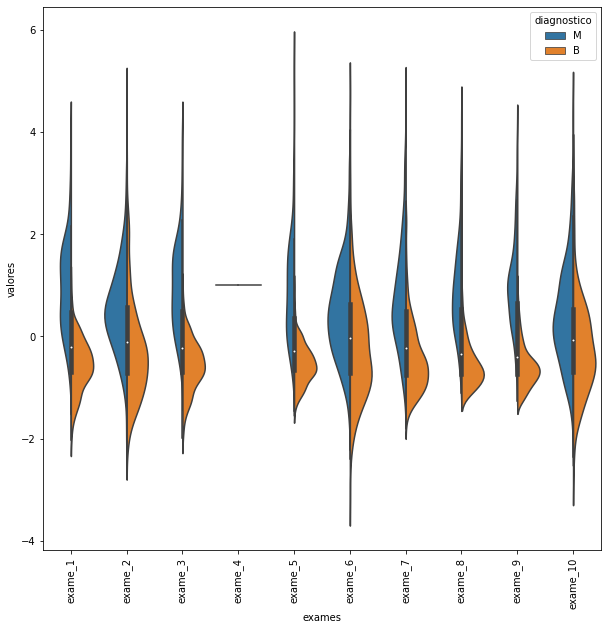

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                 columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico',  data = dados_plot, split = True)

plt.xticks(rotation = 90)

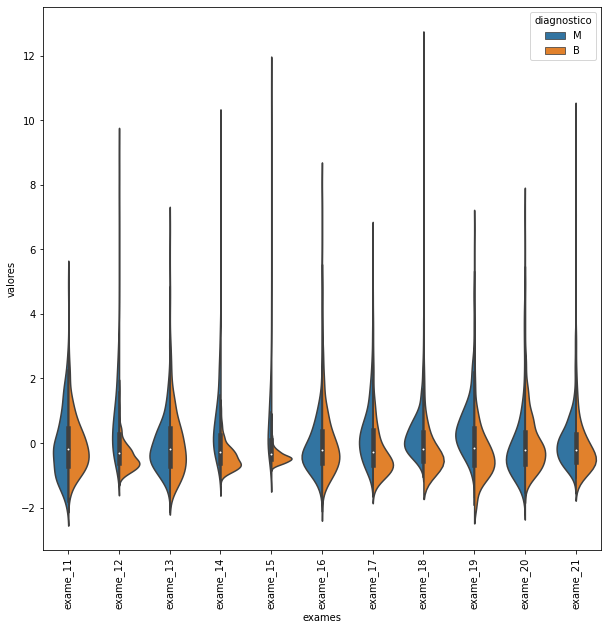

In [12]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

    plt.figure(figsize = (10,10))
    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico',  data = dados_plot, split = True)

    plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

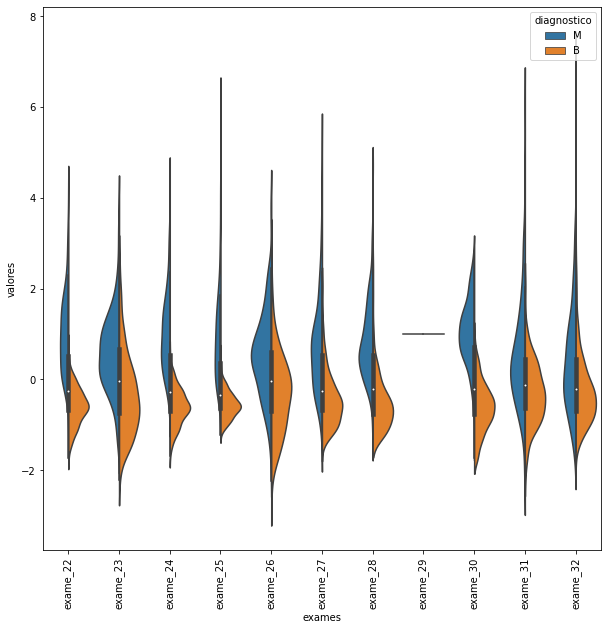

In [13]:
grafico_violino(valores_exames_v2, 21, 33)

In [14]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_29', 'exame_4'])

def classificar(valores):
    SEED = 123
    random.seed = (SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                        diagnostico,
                                                        test_size = 0.3)


    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)

# classificando o modelo
    print('o resultado da classificação foi {:.2f} %.' .format((classificador.score(teste_x, teste_y) * 100)))

classificar(valores_exames_v3)

o resultado da classificação foi 94.74 %.


<AxesSubplot:>

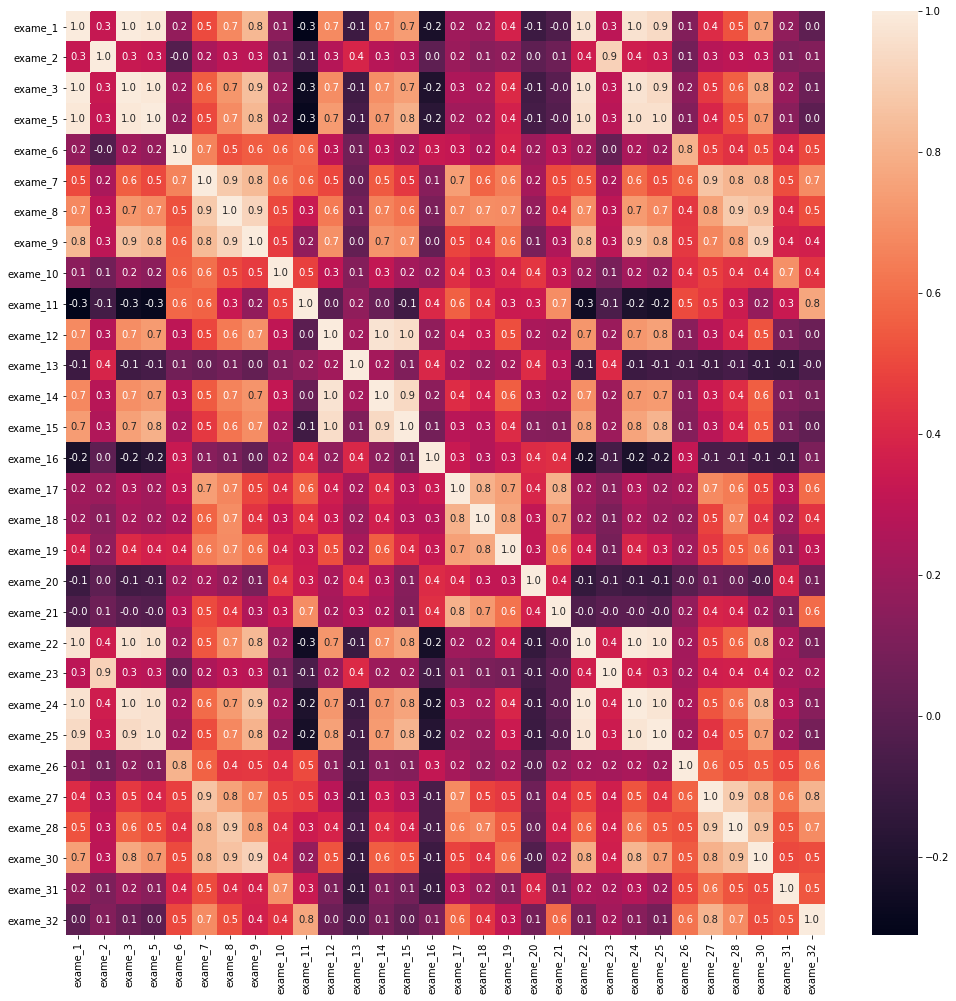

In [15]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize = (17, 17))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

In [16]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [18]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1.00]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [19]:
valores_exames_v4 = valores_exames_v3.drop(columns = variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [20]:
classificar(valores_exames_v4)

o resultado da classificação foi 97.08 %.


In [21]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])
classificar(valores_exames_v5)

o resultado da classificação foi 97.08 %.


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [23]:
# treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5,
#                                                         diagnostico,
#                                                         test_size = 0.3)

# selecionar_kmelhores.fit(treino_x, treino_y)

In [24]:
valores_exames_v6 = valores_exames_v1.drop(columns = ['exame_4', 'exame_29', 'exame_3', 'exame_24'])
valores_exames_v6

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
SEED = 1234
random.seed = (SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [26]:
teste_kbest.shape

(171, 5)

In [27]:
classificador =  RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_kbest, treino_y)

print('o resultado da classificação foi {:.2f} %.' .format((classificador.score(teste_kbest, teste_y) * 100)))


o resultado da classificação foi 93.57 %.


[Text(0.5, 38.5, 'predicao'), Text(56.5, 0.5, 'real')]

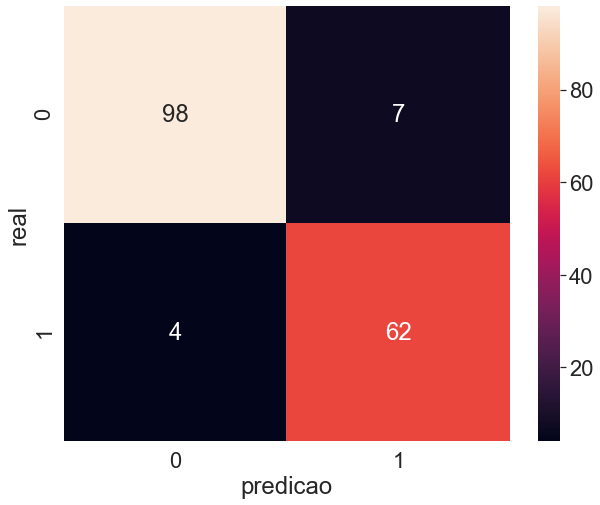

In [28]:
from sklearn.metrics import confusion_matrix


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'predicao', ylabel = 'real')


o resultado da classificação foi 93.57 %.


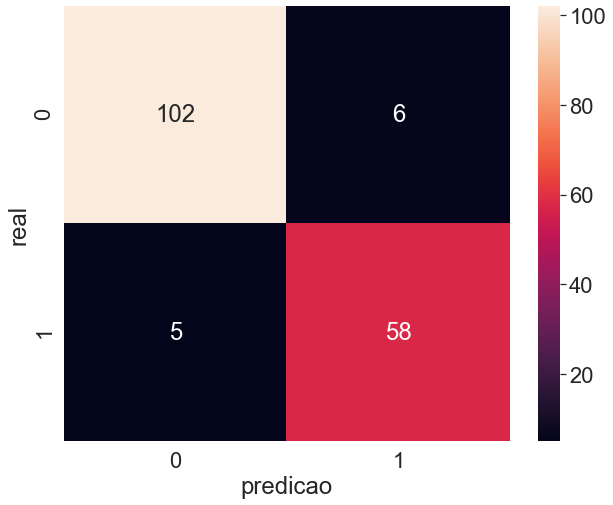

In [29]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed = (SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador =  RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'predicao', ylabel = 'real')

print('o resultado da classificação foi {:.2f} %.' .format((classificador.score(teste_rfe, teste_y) * 100)))

o resultado da classificação foi 94.74 %.


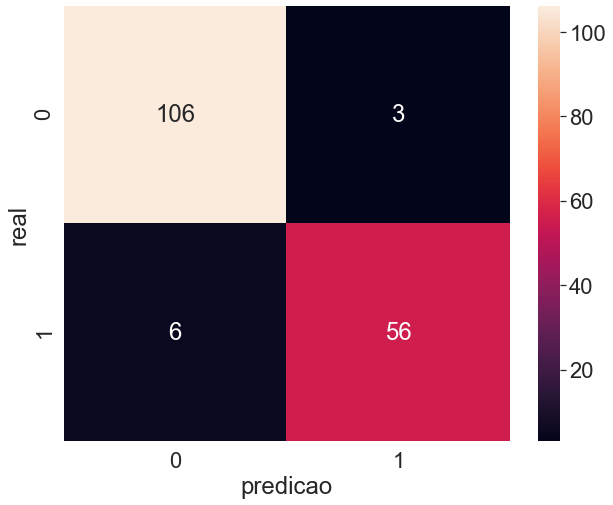

In [30]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed = (SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador =  RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring = 'accuracy')
selecionador_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'predicao', ylabel = 'real')

print('o resultado da classificação foi {:.2f} %.' .format((classificador.score(teste_rfecv, teste_y) * 100)))

In [31]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_12', 'exame_14', 'exame_15', 'exame_22', 'exame_23', 'exame_25',
       'exame_27', 'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [32]:
selecionador_rfecv.grid_scores_

array([0.85677215, 0.93968354, 0.95474684, 0.94968354, 0.94971519,
       0.95474684, 0.95224684, 0.95974684, 0.95977848, 0.96727848,
       0.96477848, 0.96984177, 0.97234177, 0.96731013, 0.96981013,
       0.96981013, 0.97484177, 0.96731013, 0.96981013, 0.96984177,
       0.96477848, 0.96731013, 0.96731013, 0.96727848, 0.96477848,
       0.96727848, 0.97231013, 0.96727848])

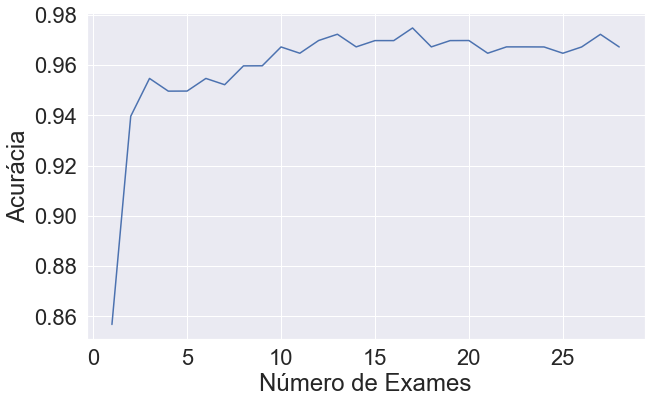

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize  = (10, 6))

plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()



In [34]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [35]:
valores_exames_v7.shape

(569, 5)

<AxesSubplot:>

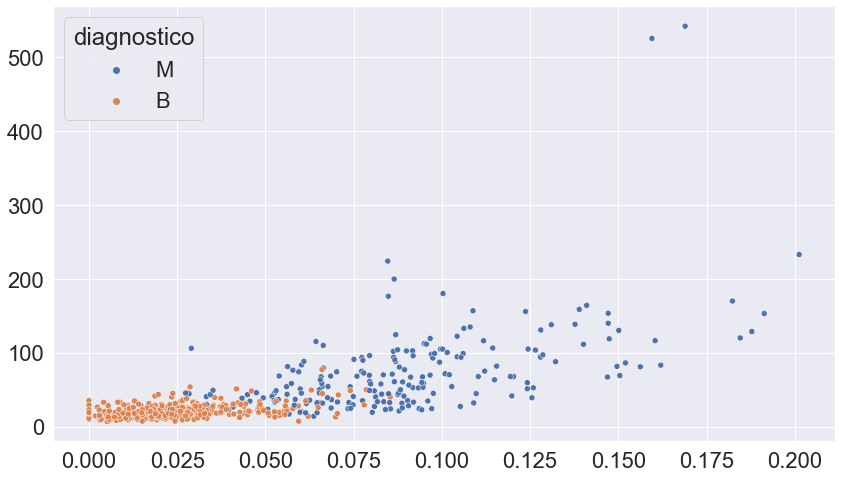

In [36]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

<AxesSubplot:>

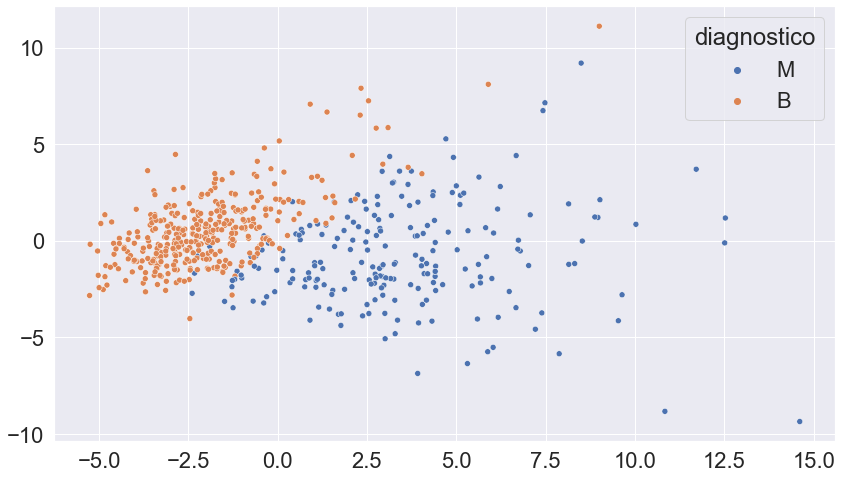

In [37]:
from sklearn.decomposition import PCA # funciona melhor com os dados normalizados

pca = PCA(n_components = 2)

valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<AxesSubplot:>

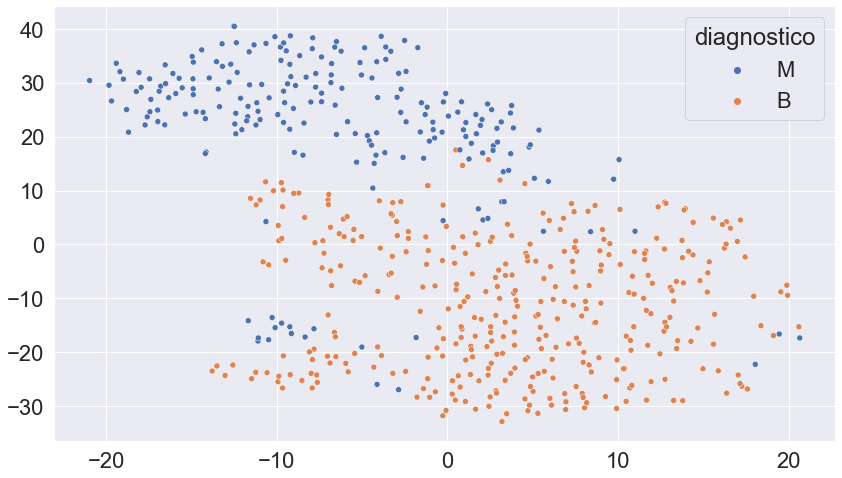

In [38]:
from sklearn.manifold import TSNE # funciona melhor com os dados normalizados

tsne = TSNE(n_components = 2)

valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)